In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import csv
import io
import datetime

In [14]:
URL = 'https://health-infobase.canada.ca/src/data/covidLive/vaccination-coverage-map.csv'
data = pd.DataFrame()
with requests.Session() as s:
    download = s.get(URL)
    decoded_content = download.content.decode('utf-8')  
    data = pd.read_csv(io.StringIO(decoded_content)) 
mb_data = data.loc[data['prename'] == 'Manitoba']
mb_data

,week_end,pruid,prename,prfname,numtotal_atleast1dose,numtotal_1dose,numtotal_2doses,proptotal_atleast1dose,proptotal_1dose,proptotal_2doses
4,2020-12-19,46,Manitoba,Manitoba,894,894,0,0.064817,0.064817225,0
15,2020-12-26,46,Manitoba,Manitoba,2177,2177,0,0.157838,0.157837918,0
27,2021-01-02,46,Manitoba,Manitoba,3432,3432,0,0.248829,0.248828541,0
40,2021-01-09,46,Manitoba,Manitoba,8694,7813,881,0.630337,0.566461944,0.063875
54,2021-01-16,46,Manitoba,Manitoba,16499,14355,2144,1.196219,1.040773225,0.155445
64,2021-01-23,46,Manitoba,Manitoba,25839,22443,3396,1.873392,1.627173353,0.246218
82,2021-01-30,46,Manitoba,Manitoba,32441,23938,8503,2.352053,1.735564573,0.616489
96,2021-02-06,46,Manitoba,Manitoba,33641,19998,13643,2.439056,1.449904768,0.989151
106,2021-02-13,46,Manitoba,Manitoba,34848,14442,20406,2.526567,1.047080941,1.479486
120,2021-02-20,46,Manitoba,Manitoba,36279,11082,25197,2.630318,0.803472579,1.826845


In [10]:
delta = []
last = 0
for item in mb_data['numtotal_atleast1dose']:
    delta.append(item - last)
    last = item

In [58]:
total_doses = mb_data['numtotal_atleast1dose'].iloc[-1]
percent_dosed = mb_data['proptotal_atleast1dose'].iloc[-1] / 100
population = int(total_doses / percent_dosed)
remaining_pop = population - total_doses
vaccinated_last_week = delta[-1]
weeks_left = int(remaining_pop / vaccinated_last_week)
last_date = datetime.datetime.strptime(mb_data['week_end'].iloc[-1], '%Y-%m-%d')
end_date = last_date + datetime.timedelta(weeks=weeks_left)

print(f'Updated as of {last_date}')
print(f'{vaccinated_last_week} doses of vaccine were administered this week')
print(f'{total_doses} total doses have been adminstered')
print(f"Enough vaccine has been adminstered to vaccinate {percent_dosed:.2%} of Manitoba's population")
print(f"At this rate it will take {weeks_left} weeks ({end_date.strftime('%Y-%m-%d')}) until everyone the equivilant of one dose per person has been administered")


Updated as of 2021-02-27 00:00:00
10372 doses of vaccine were administered this week
46651 total doses have been adminstered
Enough vaccine has been adminstered to vaccinate 3.38% of Manitoba's population
At this rate it will take 128 weeks (2023-08-12) until everyone the equivilant of one dose per person has been administered


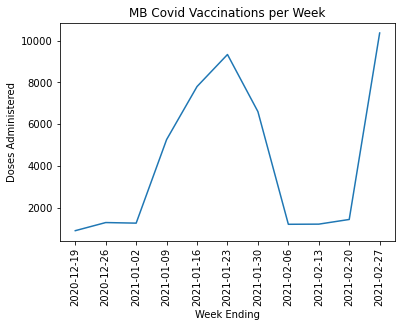

In [11]:
plt.plot(mb_data['week_end'], delta)
plt.title('MB Covid Vaccinations per Week')
plt.xlabel('Week Ending')
plt.xticks(mb_data['week_end'], mb_data['week_end'], rotation='vertical')
plt.ylabel('Doses Administered')
plt.show()

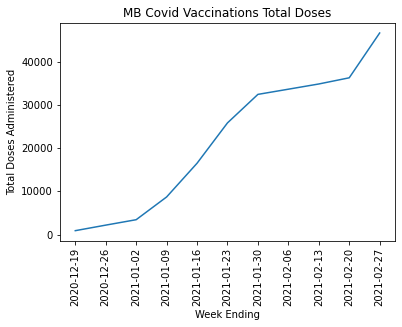

In [12]:
plt.plot(mb_data['week_end'], mb_data['numtotal_atleast1dose'])
plt.title('MB Covid Vaccinations Total Doses')
plt.xlabel('Week Ending')
plt.xticks(mb_data['week_end'], mb_data['week_end'], rotation='vertical')
plt.ylabel('Total Doses Administered')
plt.show()

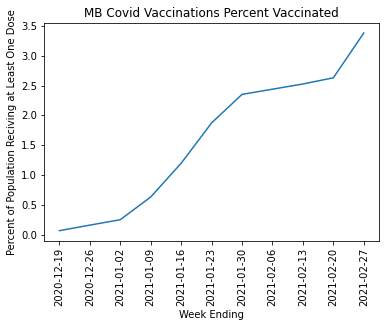

In [13]:
plt.plot(mb_data['week_end'], mb_data['proptotal_atleast1dose'])
plt.title('MB Covid Vaccinations Percent Vaccinated')
plt.xlabel('Week Ending')
plt.xticks(mb_data['week_end'], mb_data['week_end'], rotation='vertical')
plt.ylabel('Percent of Population Reciving at Least One Dose')
plt.show()